In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def func(xdata,m,b):
    return b +xdata*m

In [3]:
Power_supply_setpoint=[0,100,200,300,400]

R1_Voltage_1=[5.84, 96, 208,  300,410]
R1_Voltage_1_err=[0.1,1,5,5,5]
R1_amps_1   =[-2,-0.860,0.080,1.1,2.1]
R1_amps_1_err=[0.2,0.2,0.2,0.2,0.2]


R2_V=[5.6,110,208,310,408]
R2_V_E=[0.1,2,5,5,5]

R2_A=[-1.92,-0.840,0.200,1.2,2.16]
R2_A_E=[0.2,0.2,0.2,0.2,0.2]

R3_V=[10,110,212,304,405]
R3_V_E=[5,5,5,5,5]

R3_A=[-1.84,-0.880,0.180,1.12,2.16]
R3_A_E=[0.2,0.2,0.2,0.2,0.2]

R4_V=[8.4,104,206,326,404]
R4_V_E=[5,5,5,5,5]

R4_A=[-1.6,4.3,7.04,8.8,10]
R4_A_E=[0.2,0.2,0.2,0.2,0.2]


Through_anode_voltage_1=[9.8,  105,   207,  319,415]
Through_anode_amps_1   =[-1.84,-0.880,0.190,1.2,2.16]



R1_fit_popt, R1_fit_pcov = curve_fit(func, R1_Voltage_1, R1_amps_1, sigma=R1_amps_1_err,absolute_sigma=False)
R1T_fit_popt, R1T_fit_pcov = curve_fit(func, Through_anode_voltage_1, Through_anode_amps_1, sigma=R1_amps_1_err,absolute_sigma=True)

R2_fit_popt, R2_fit_pcov = curve_fit(func, R2_V, R2_A, sigma=R2_A_E,absolute_sigma=False)
R3_fit_popt, R3_fit_pcov = curve_fit(func, R3_V, R3_A, sigma=R3_A_E,absolute_sigma=False)
R4_fit_popt, R4_fit_pcov = curve_fit(func, R4_V[1:], R4_A[1:], sigma=R4_A_E[1:],absolute_sigma=False)



xfit=np.arange(0,420,1)
R1fit= func(xfit,R1_fit_popt[0],R1_fit_popt[1])
Thrfit= func(xfit,R1T_fit_popt[0],R1T_fit_popt[1])
R2fit= func(xfit,R2_fit_popt[0],R2_fit_popt[1])
R3fit= func(xfit,R3_fit_popt[0],R3_fit_popt[1])
R4fit= func(xfit,R4_fit_popt[0],R4_fit_popt[1])

print(R1_fit_popt, R1_fit_pcov)
print(R1T_fit_popt, R1T_fit_pcov)

[ 0.01001696 -1.9591384 ] [[ 1.16829005e-07 -2.38293787e-05]
 [-2.38293787e-05  7.25774749e-03]]
[ 0.00983528 -1.91081747] [[ 3.80904096e-07 -8.04317079e-05]
 [-8.04317079e-05  2.49839592e-02]]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

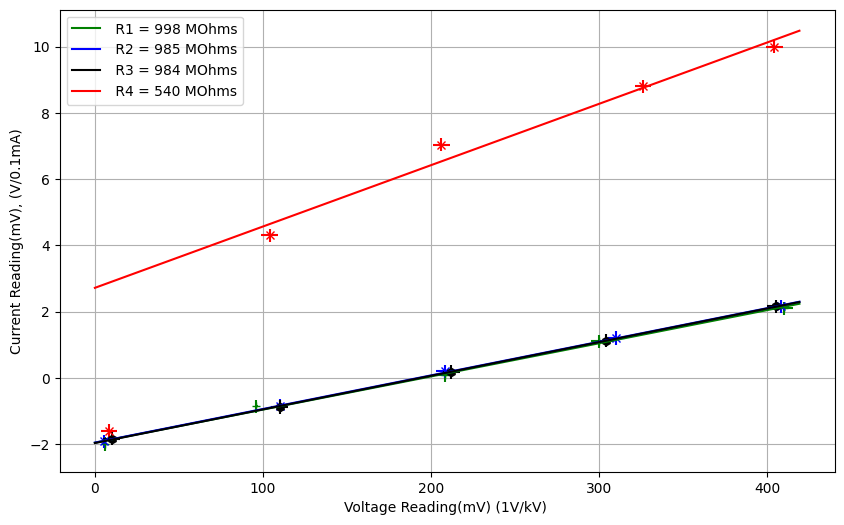

In [4]:
fig, plots = plt.subplots(1, 1, figsize=(10,6))

plt.errorbar(x=R1_Voltage_1,xerr=R1_Voltage_1_err,y=R1_amps_1,yerr=R1_amps_1_err,fmt="+ ",color="green" )
plt.errorbar(x=R2_V,xerr=R2_V_E,y=R2_A,yerr=R2_A_E,fmt="x ",color="blue" )
plt.errorbar(x=R3_V,xerr=R3_V_E,y=R3_A,yerr=R3_A_E,fmt="h ",color="k" )
plt.errorbar(x=R4_V,xerr=R4_V_E,y=R4_A,yerr=R4_A_E,fmt="x ",color="red" )
#plt.errorbar(x=Through_anode_voltage_1,xerr=R1_Voltage_1_err,y=Through_anode_amps_1,yerr=R1_amps_1_err,fmt="+ ",color="red")


plt.errorbar(xfit,R1fit,color="green" , label= " R1 = %.0f MOhms"%(  1/(R1_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
plt.errorbar(xfit,R2fit,color="blue" , label= " R2 = %.0f MOhms"%(  1/(R2_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
plt.errorbar(xfit,R3fit,color="k" , label= " R3 = %.0f MOhms"%(  1/(R3_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
plt.errorbar(xfit,R4fit,color="red" , label= " R4 = %.0f MOhms"%(  1/(R4_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
#plt.errorbar(xfit,Thrfit,color="red" ,label =" R1 w/cathode = %.0f MOhms"%(1/(R1T_fit_popt[0] * (1/1000) *0.0001 )/1000000) )

plt.grid()
plt.legend()

plt.xlabel("Voltage Reading(mV) (1V/kV) ")
plt.ylabel("Current Reading(mV), (V/0.1mA)")


plt.tight_layout

In [5]:
1/(R1T_fit_popt[0] * (1/1000) *0.0001 )

1016747996.2982374

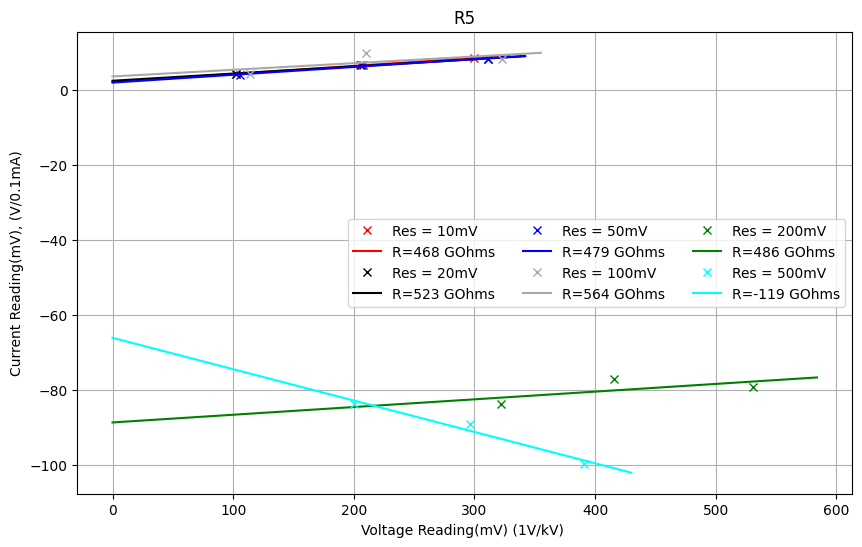

In [6]:
#R5 data

dv=[10,20,50,100,200,500]

v_1 =[102,102,106,114,322,200]
a_1 =[4.28,4.28,4,4.28,-83.7,-83.7]

v_2 =[205,206,208,210,416,296]
a_2 =[6.84,6.84,6.84,10.,-77.1,-89.1]

v_3 =[300,311,311,323,531,391]
a_3 =[8.5,8.28,8.28,8.20,-79.1,-99.7]


fig, plots = plt.subplots(1, 1, figsize=(10,6))
x=[]
y=[]

cs=["r","k","b","darkgray","green","cyan"]

for i in [0,1,2,3,4,5]:
    xi=[v_1[i],v_2[i],v_3[i]]
    yi=[a_1[i],a_2[i],a_3[i]]

    
    popt, pcov = curve_fit(func, xi, yi)
    xfit=np.arange(0,v_3[i]*1.1)
    yfit= func(xfit,popt[0],popt[1])

    plots.errorbar(xi,yi,fmt="x",label="Res = %dmV"%(dv[i]),color=cs[i])
    plots.errorbar(xfit,yfit,color=cs[i],label="R=%.f GOhms"%(  1/(popt[0] * (1/1000) *0.0001 )/1000000)  )


plt.title("R5")
plt.xlabel("Voltage Reading(mV) (1V/kV) ")
plt.ylabel("Current Reading(mV), (V/0.1mA)")
plots.legend(ncol=3)
plots.grid()




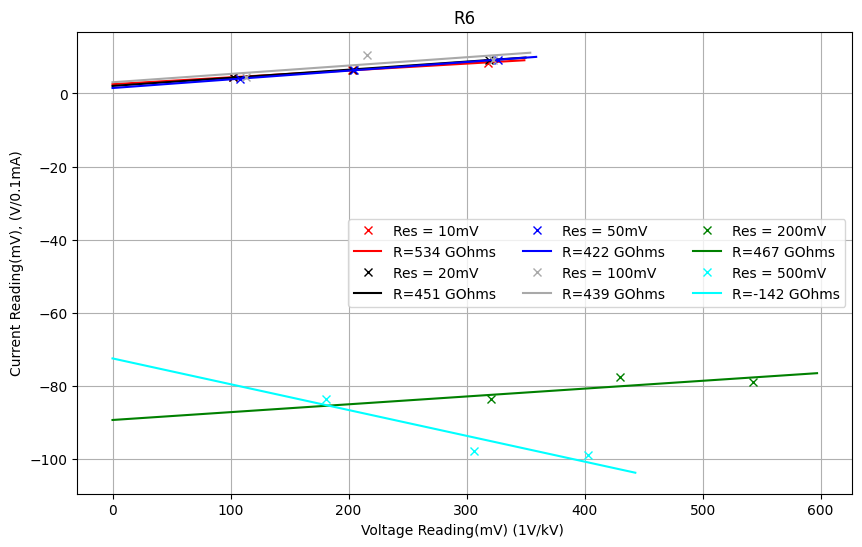

In [7]:
#R6 values
dv=[10,20,50,100,200,500]

v_1 =[102,102,108,113,321,181]
a_1 =[4.4,4.4,4,4.4,-83.6,-83.6]

v_2 =[203,204,205,216,430,306]
a_2 =[6.4,6.4,6.4,10.4,-77.6,-97.6]

v_3 =[318,319,327,322,543,403]
a_3 =[8.45,9.2,9.2,9.2,-78.8,-98.8]


fig, plots = plt.subplots(1, 1, figsize=(10,6))
x=[]
y=[]

cs=["r","k","b","darkgray","green","cyan"]

for i in [0,1,2,3,4,5]:
    xi=[v_1[i],v_2[i],v_3[i]]
    yi=[a_1[i],a_2[i],a_3[i]]

    
    popt, pcov = curve_fit(func, xi, yi)
    xfit=np.arange(0,v_3[i]*1.1)
    yfit= func(xfit,popt[0],popt[1])

    plots.errorbar(xi,yi,fmt="x",label="Res = %dmV"%(dv[i]),color=cs[i])
    plots.errorbar(xfit,yfit,color=cs[i],label="R=%.f GOhms"%(  1/(popt[0] * (1/1000) *0.0001 )/1000000)  )

plt.title("R6")
plt.xlabel("Voltage Reading(mV) (1V/kV) ")
plt.ylabel("Current Reading(mV), (V/0.1mA)")
plots.legend(ncol=3)
plots.grid()






[306, 406, 506] -3 6


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

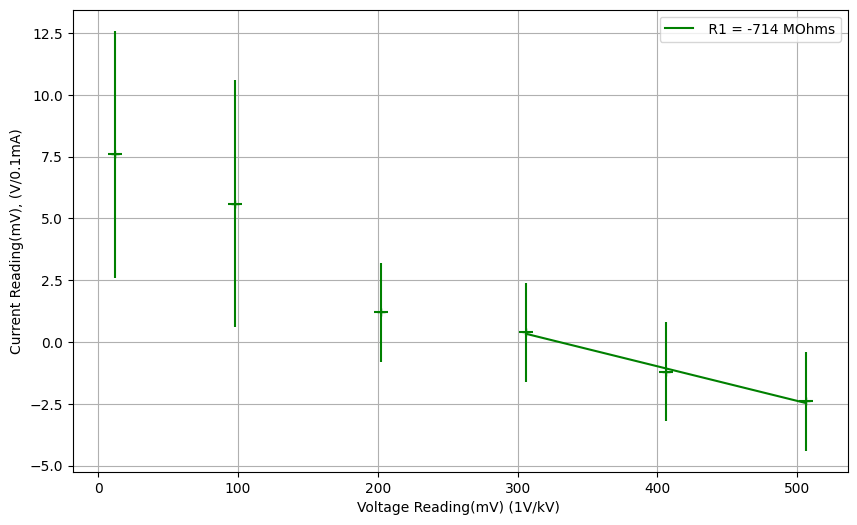

In [8]:
R1_V=[12,98,202,306,406,506]
R1_V_E=[5,5,5,5,5,5]

R1_A=[7.6,5.6,1.2,.4,-1.2,-2.4]
R1_A_E=[5,5,2,2,2,2]

fit_range_1=-3
fit_range_2=len(R1_V)

print(R1_V[fit_range_1:fit_range_2],fit_range_1,fit_range_2)

R1_fit_popt, R1_fit_pcov = curve_fit(func, R1_V[fit_range_1:fit_range_2], R1_A[fit_range_1:fit_range_2], sigma=R1_A_E[fit_range_1:fit_range_2],absolute_sigma=False)

xfit=np.arange(R1_V[fit_range_1],R1_V[fit_range_2-1]+1,1)
R1fit= func(xfit,R1_fit_popt[0],R1_fit_popt[1])


fig, plots = plt.subplots(1, 1, figsize=(10,6))

plt.errorbar(x=R1_V,xerr=R1_V_E,y=R1_A,yerr=R1_A_E,fmt="+ ",color="green" )
#plt.errorbar(x=R2_V,xerr=R2_V_E,y=R2_A,yerr=R2_A_E,fmt="x ",color="blue" )
#plt.errorbar(x=R3_V,xerr=R3_V_E,y=R3_A,yerr=R3_A_E,fmt="h ",color="k" )
#plt.errorbar(x=R4_V,xerr=R4_V_E,y=R4_A,yerr=R4_A_E,fmt="x ",color="red" )
#plt.errorbar(x=Through_anode_voltage_1,xerr=R1_Voltage_1_err,y=Through_anode_amps_1,yerr=R1_amps_1_err,fmt="+ ",color="red")


plt.errorbar(xfit,R1fit,color="green" , label= " R1 = %.0f MOhms"%(  1/(R1_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
#plt.errorbar(xfit,R2fit,color="blue" , label= " R2 = %.0f MOhms"%(  1/(R2_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
#plt.errorbar(xfit,R3fit,color="k" , label= " R3 = %.0f MOhms"%(  1/(R3_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
#plt.errorbar(xfit,R4fit,color="red" , label= " R4 = %.0f MOhms"%(  1/(R4_fit_popt[0] * (1/1000) *0.0001 )/1000000) )
#plt.errorbar(xfit,Thrfit,color="red" ,label =" R1 w/cathode = %.0f MOhms"%(1/(R1T_fit_popt[0] * (1/1000) *0.0001 )/1000000) )

plt.grid()
plt.legend()

plt.xlabel("Voltage Reading(mV) (1V/kV) ")
plt.ylabel("Current Reading(mV), (V/0.1mA)")


plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

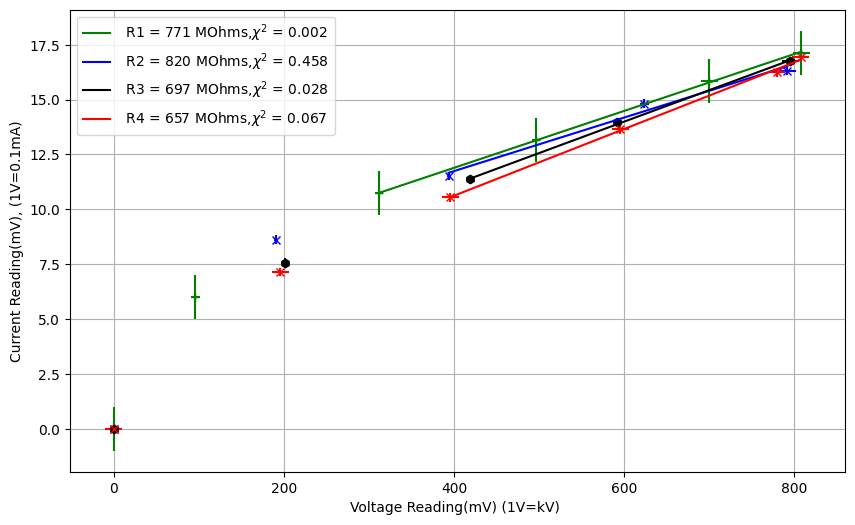

In [9]:
R1_V=np.array([8,104,320,504,708,816]) -8
R1_V_E=np.array([5,5,5,5,10,10])

R1_A=np.array([1.76,7.76,12.5,14.9,17.6,18.9]) -1.76
R1_A_E=np.array([1,1,1,1,1,1])

R2_V  =np.array([6.4,197,400,630,798]) -6.4
R2_V_E=np.array([2,2,2,5,10])
R2_A  =np.array([2.88,11.5,14.4,17.7,19.2]) -2.88
R2_A_E=np.array([0.2,0.2,0.2,0.2,0.2])

R3_V  =np.array([6.8,208,426,598,802]) -6.8
R3_V_E=np.array([5,5,5,5,10])
R3_A  =np.array([2.64,10.2,14.0,16.6,19.4]) -2.64
R3_A_E=np.array([0.2,0.2,0.2,0.2,0.2])

R4_V  =np.array([12.6,208,408,608,792,820]) -12.6
R4_V_E=np.array([10,10,10,10,10,10])
R4_A  =np.array([2.96,10.1,13.5,16.6,19.2,19.9]) -2.96
R4_A_E=np.array([0.2,0.2,0.2,0.2,0.2,0.2])

''' Unused resitior in breadboard
R2_V  =[8,104,207,313]
R2_V_E=[2,2,2,2]
R2_A  =[2.08,8.08,10.08,12.70]
R2_A_E=[0.2,0.2,0.2,0.2]
'''

R1_fit_range_1=2
R1_fit_range_2=len(R1_V)

R2_fit_range_1=2
R2_fit_range_2=len(R2_V)

R3_fit_range_1=2
R3_fit_range_2=len(R3_V)

R4_fit_range_1=2
R4_fit_range_2=len(R4_V)

#print(R1_V[fit_range_1:fit_range_2],fit_range_1,fit_range_2)

R1_fit_popt, R1_fit_pcov = curve_fit(func, R1_V[R1_fit_range_1:R1_fit_range_2], R1_A[R1_fit_range_1:R1_fit_range_2], sigma=R1_A_E[R1_fit_range_1:R1_fit_range_2],absolute_sigma=True)
R2_fit_popt, R2_fit_pcov = curve_fit(func, R2_V[R2_fit_range_1:R2_fit_range_2], R2_A[R2_fit_range_1:R2_fit_range_2], sigma=R2_A_E[R2_fit_range_1:R2_fit_range_2],absolute_sigma=True)
R3_fit_popt, R3_fit_pcov = curve_fit(func, R3_V[R3_fit_range_1:R3_fit_range_2], R3_A[R3_fit_range_1:R3_fit_range_2], sigma=R3_A_E[R3_fit_range_1:R3_fit_range_2],absolute_sigma=True)
R4_fit_popt, R4_fit_pcov = curve_fit(func, R4_V[R4_fit_range_1:R4_fit_range_2], R4_A[R4_fit_range_1:R4_fit_range_2], sigma=R4_A_E[R4_fit_range_1:R4_fit_range_2],absolute_sigma=True)

R1_xfit=np.arange(R1_V[R1_fit_range_1],R1_V[R1_fit_range_2-1]+1,1)
R2_xfit=np.arange(R2_V[R2_fit_range_1],R2_V[R2_fit_range_2-1]+1,1)
R3_xfit=np.arange(R3_V[R3_fit_range_1],R3_V[R3_fit_range_2-1]+1,1)
R4_xfit=np.arange(R4_V[R4_fit_range_1],R4_V[R4_fit_range_2-1]+1,1)

R1fit= func(R1_xfit,R1_fit_popt[0],R1_fit_popt[1])
R2fit= func(R2_xfit,R2_fit_popt[0],R2_fit_popt[1])
R3fit= func(R3_xfit,R3_fit_popt[0],R3_fit_popt[1])
R4fit= func(R4_xfit,R4_fit_popt[0],R4_fit_popt[1])


fig, plots = plt.subplots(1, 1, figsize=(10,6))

plt.errorbar(x=R1_V,xerr=R1_V_E,y=R1_A,yerr=R1_A_E,fmt="+ ",color="green" )
plt.errorbar(x=R2_V,xerr=R2_V_E,y=R2_A,yerr=R2_A_E,fmt="x ",color="blue" )
plt.errorbar(x=R3_V,xerr=R3_V_E,y=R3_A,yerr=R3_A_E,fmt="h ",color="k" )
plt.errorbar(x=R4_V,xerr=R4_V_E,y=R4_A,yerr=R4_A_E,fmt="x ",color="red" )
#plt.errorbar(x=Through_anode_voltage_1,xerr=R1_Voltage_1_err,y=Through_anode_amps_1,yerr=R1_amps_1_err,fmt="+ ",color="red")



yfit_R1=np.array(func(np.array(R1_V),R1_fit_popt[0],R1_fit_popt[1]))
R1_chi_sqr = np.sum( (yfit_R1[R1_fit_range_1:R1_fit_range_2] - R1_A[R1_fit_range_1:R1_fit_range_2])**2 /R1_A_E[R1_fit_range_1:R1_fit_range_2])
R1_redchi= R1_chi_sqr/(len(R1_V[R1_fit_range_1:R1_fit_range_2])-1)


yfit_R2=func(R2_V,R2_fit_popt[0],R2_fit_popt[1])
R2_chi_sqr = sum( (yfit_R2[R2_fit_range_1:R2_fit_range_2] - R2_A[R2_fit_range_1:R2_fit_range_2])**2 /R2_A_E[R2_fit_range_1:R2_fit_range_2])
R2_redchi= R2_chi_sqr/(len(R2_V[R2_fit_range_1:R2_fit_range_2])-1)

yfit_R3=func(R3_V,R3_fit_popt[0],R3_fit_popt[1])
R3_chi_sqr = sum( (yfit_R3[R3_fit_range_1:R3_fit_range_2] - R3_A[R3_fit_range_1:R3_fit_range_2])**2 /R3_A_E[R3_fit_range_1:R3_fit_range_2])
R3_redchi= R3_chi_sqr/(len(R3_V[R3_fit_range_1:R3_fit_range_2])-1)

yfit_R4=func(R4_V,R4_fit_popt[0],R4_fit_popt[1])
R4_chi_sqr = sum( (yfit_R4[R4_fit_range_1:R4_fit_range_2]- R4_A[R4_fit_range_1:R4_fit_range_2])**2 /R4_A_E[R4_fit_range_1:R4_fit_range_2])
R4_redchi= R4_chi_sqr/(len(R4_V[R4_fit_range_1:R4_fit_range_2])-1)



plt.errorbar(R1_xfit,R1fit,color="green" , label= " R1 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R1_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R1_redchi))
plt.errorbar(R2_xfit,R2fit,color="blue" , label= " R2 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R2_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R2_redchi) )
plt.errorbar(R3_xfit,R3fit,color="k" , label= " R3 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R3_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R3_redchi) )
plt.errorbar(R4_xfit,R4fit,color="red" , label= " R4 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R4_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R4_redchi ) )
#plt.errorbar(xfit,Thrfit,color="red" ,label =" R1 w/cathode = %.0f MOhms"%(1/(R1T_fit_popt[0] * (1/1000) *0.0001 )/1000000) )

plt.grid()
plt.legend()

plt.xlabel("Voltage Reading(mV) (1V=kV) ")
plt.ylabel("Current Reading(mV), (1V=0.1mA)")


plt.tight_layout


In [10]:
yfit_R1[R1_fit_range_1:R1_fit_range_2] , R1_A[R1_fit_range_1:R1_fit_range_2]

(array([10.75296985, 13.13878838, 15.78393501, 17.18430676]),
 array([10.74, 13.14, 15.84, 17.14]))

In [11]:
R1_fit_popt,R2_fit_popt,R3_fit_popt,R4_fit_popt


(array([0.01296641, 6.70745147]),
 array([0.01219649, 6.86633176]),
 array([0.01434216, 5.39459582]),
 array([0.01520935, 4.53909595]))

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

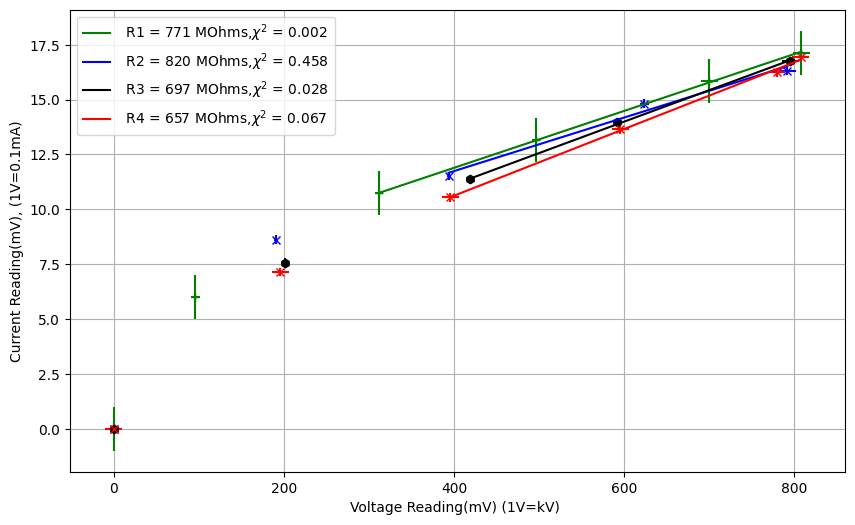

In [12]:
R1_V=np.array([8,104,320,504,708,816]) -8
R1_V_E=np.array([5,5,5,5,10,10])

R1_A=np.array([1.76,7.76,12.5,14.9,17.6,18.9]) -1.76
R1_A_E=np.array([1,1,1,1,1,1])

R2_V  =np.array([6.4,197,400,630,798]) -6.4
R2_V_E=np.array([2,2,2,5,10])
R2_A  =np.array([2.88,11.5,14.4,17.7,19.2]) -2.88
R2_A_E=np.array([0.2,0.2,0.2,0.2,0.2])

R3_V  =np.array([6.8,208,426,598,802]) -6.8
R3_V_E=np.array([5,5,5,5,10])
R3_A  =np.array([2.64,10.2,14.0,16.6,19.4]) -2.64
R3_A_E=np.array([0.2,0.2,0.2,0.2,0.2])

R4_V  =np.array([12.6,208,408,608,792,820]) -12.6
R4_V_E=np.array([10,10,10,10,10,10])
R4_A  =np.array([2.96,10.1,13.5,16.6,19.2,19.9]) -2.96
R4_A_E=np.array([0.2,0.2,0.2,0.2,0.2,0.2])

''' Unused resitior in breadboard
R2_V  =[8,104,207,313]
R2_V_E=[2,2,2,2]
R2_A  =[2.08,8.08,10.08,12.70]
R2_A_E=[0.2,0.2,0.2,0.2]
'''

R1_fit_range_1=2
R1_fit_range_2=len(R1_V)

R2_fit_range_1=2
R2_fit_range_2=len(R2_V)

R3_fit_range_1=2
R3_fit_range_2=len(R3_V)

R4_fit_range_1=2
R4_fit_range_2=len(R4_V)

#print(R1_V[fit_range_1:fit_range_2],fit_range_1,fit_range_2)

R1_fit_popt, R1_fit_pcov = curve_fit(func, R1_V[R1_fit_range_1:R1_fit_range_2], R1_A[R1_fit_range_1:R1_fit_range_2], sigma=R1_A_E[R1_fit_range_1:R1_fit_range_2],absolute_sigma=True)
R2_fit_popt, R2_fit_pcov = curve_fit(func, R2_V[R2_fit_range_1:R2_fit_range_2], R2_A[R2_fit_range_1:R2_fit_range_2], sigma=R2_A_E[R2_fit_range_1:R2_fit_range_2],absolute_sigma=True)
R3_fit_popt, R3_fit_pcov = curve_fit(func, R3_V[R3_fit_range_1:R3_fit_range_2], R3_A[R3_fit_range_1:R3_fit_range_2], sigma=R3_A_E[R3_fit_range_1:R3_fit_range_2],absolute_sigma=True)
R4_fit_popt, R4_fit_pcov = curve_fit(func, R4_V[R4_fit_range_1:R4_fit_range_2], R4_A[R4_fit_range_1:R4_fit_range_2], sigma=R4_A_E[R4_fit_range_1:R4_fit_range_2],absolute_sigma=True)

R1_xfit=np.arange(R1_V[R1_fit_range_1],R1_V[R1_fit_range_2-1]+1,1)
R2_xfit=np.arange(R2_V[R2_fit_range_1],R2_V[R2_fit_range_2-1]+1,1)
R3_xfit=np.arange(R3_V[R3_fit_range_1],R3_V[R3_fit_range_2-1]+1,1)
R4_xfit=np.arange(R4_V[R4_fit_range_1],R4_V[R4_fit_range_2-1]+1,1)

R1fit= func(R1_xfit,R1_fit_popt[0],R1_fit_popt[1])
R2fit= func(R2_xfit,R2_fit_popt[0],R2_fit_popt[1])
R3fit= func(R3_xfit,R3_fit_popt[0],R3_fit_popt[1])
R4fit= func(R4_xfit,R4_fit_popt[0],R4_fit_popt[1])


fig, plots = plt.subplots(1, 1, figsize=(10,6))

plt.errorbar(x=R1_V,xerr=R1_V_E,y=R1_A,yerr=R1_A_E,fmt="+ ",color="green" )
plt.errorbar(x=R2_V,xerr=R2_V_E,y=R2_A,yerr=R2_A_E,fmt="x ",color="blue" )
plt.errorbar(x=R3_V,xerr=R3_V_E,y=R3_A,yerr=R3_A_E,fmt="h ",color="k" )
plt.errorbar(x=R4_V,xerr=R4_V_E,y=R4_A,yerr=R4_A_E,fmt="x ",color="red" )
#plt.errorbar(x=Through_anode_voltage_1,xerr=R1_Voltage_1_err,y=Through_anode_amps_1,yerr=R1_amps_1_err,fmt="+ ",color="red")



yfit_R1=np.array(func(np.array(R1_V),R1_fit_popt[0],R1_fit_popt[1]))
R1_chi_sqr = np.sum( (yfit_R1[R1_fit_range_1:R1_fit_range_2] - R1_A[R1_fit_range_1:R1_fit_range_2])**2 /R1_A_E[R1_fit_range_1:R1_fit_range_2])
R1_redchi= R1_chi_sqr/(len(R1_V[R1_fit_range_1:R1_fit_range_2])-1)


yfit_R2=func(R2_V,R2_fit_popt[0],R2_fit_popt[1])
R2_chi_sqr = sum( (yfit_R2[R2_fit_range_1:R2_fit_range_2] - R2_A[R2_fit_range_1:R2_fit_range_2])**2 /R2_A_E[R2_fit_range_1:R2_fit_range_2])
R2_redchi= R2_chi_sqr/(len(R2_V[R2_fit_range_1:R2_fit_range_2])-1)

yfit_R3=func(R3_V,R3_fit_popt[0],R3_fit_popt[1])
R3_chi_sqr = sum( (yfit_R3[R3_fit_range_1:R3_fit_range_2] - R3_A[R3_fit_range_1:R3_fit_range_2])**2 /R3_A_E[R3_fit_range_1:R3_fit_range_2])
R3_redchi= R3_chi_sqr/(len(R3_V[R3_fit_range_1:R3_fit_range_2])-1)

yfit_R4=func(R4_V,R4_fit_popt[0],R4_fit_popt[1])
R4_chi_sqr = sum( (yfit_R4[R4_fit_range_1:R4_fit_range_2]- R4_A[R4_fit_range_1:R4_fit_range_2])**2 /R4_A_E[R4_fit_range_1:R4_fit_range_2])
R4_redchi= R4_chi_sqr/(len(R4_V[R4_fit_range_1:R4_fit_range_2])-1)



plt.errorbar(R1_xfit,R1fit,color="green" , label= " R1 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R1_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R1_redchi))
plt.errorbar(R2_xfit,R2fit,color="blue" , label= " R2 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R2_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R2_redchi) )
plt.errorbar(R3_xfit,R3fit,color="k" , label= " R3 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R3_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R3_redchi) )
plt.errorbar(R4_xfit,R4fit,color="red" , label= " R4 = %.0f MOhms,$ \chi^2$ = %0.3f"%(  1/(R4_fit_popt[0] * (1/1000) *0.0001 )/1000000 ,R4_redchi ) )
#plt.errorbar(xfit,Thrfit,color="red" ,label =" R1 w/cathode = %.0f MOhms"%(1/(R1T_fit_popt[0] * (1/1000) *0.0001 )/1000000) )

plt.grid()
plt.legend()

plt.xlabel("Voltage Reading(mV) (1V=kV) ")
plt.ylabel("Current Reading(mV), (1V=0.1mA)")


plt.tight_layout


R   2
4
R   3
6
R   4
6
R   5
6


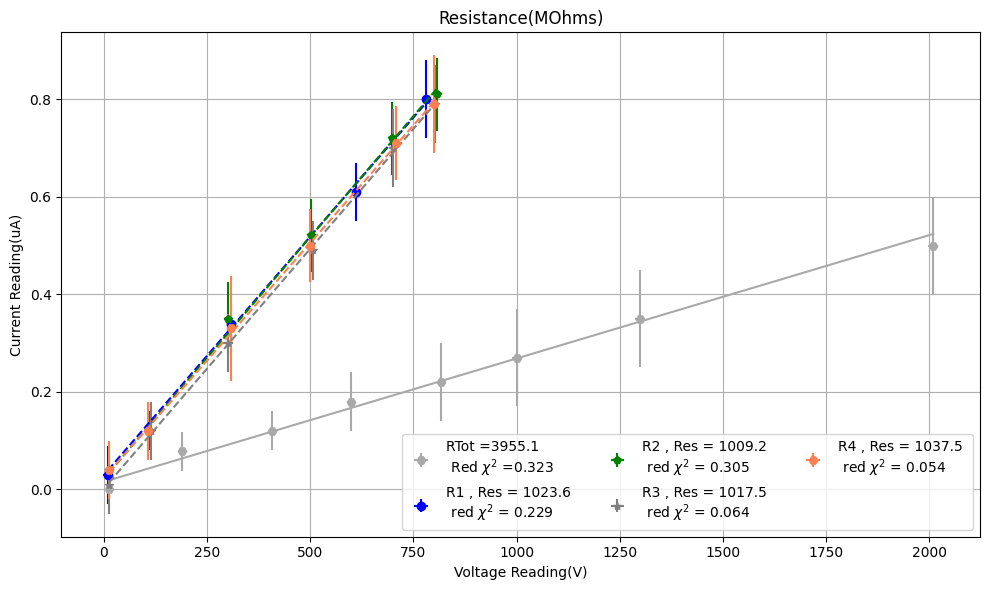

In [13]:
AllR_V=           [12,190,407,600,816,1000,1300,2010]
AllR_V_E=np.array([16,16 ,16 ,16 ,16 ,24  ,24  ,24])/2.0

AllR_A  = np.array( [0  ,.78,1.2  ,1.8,2.2  ,2.7,3.5,5.])
AllR_A_E=np.array([1.6,1.6,1.6,2.4,3.2,4  ,4  ,4])/2.0  * 0.05


#AllR_V=  [1.6,100,205,309,409,503,601,713,821,1060]
#AllR_V_E=[2,2,2,2,2,2,5,10,10,20]

#AllR_A  =[2.8,4.8,6.64,7.64,8.72,9.52,10.1,10.8,11.4,11.7]
#AllR_A_E=[0.4,0.4,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40]

AllR_fit_range_1=0
AllR_fit_range_2=len(AllR_A)

AllR_fit_popt, AllR_fit_pcov = curve_fit(func, 
                                     AllR_V[AllR_fit_range_1:AllR_fit_range_2], 
                                     AllR_A[AllR_fit_range_1:AllR_fit_range_2], 
                                     sigma=AllR_A_E[AllR_fit_range_1:AllR_fit_range_2],
                                     absolute_sigma=True)

yfit_AllR=np.array(func(np.array(AllR_V),AllR_fit_popt[0],AllR_fit_popt[1]))
AllR_chi_sqr = np.sum( (yfit_AllR[AllR_fit_range_1:AllR_fit_range_2] - AllR_A[AllR_fit_range_1:AllR_fit_range_2])**2 /AllR_A_E[AllR_fit_range_1:AllR_fit_range_2])
AllR_redchi= AllR_chi_sqr/(len(AllR_V[AllR_fit_range_1:AllR_fit_range_2])-1)

AllR_xfit=np.arange(AllR_V[AllR_fit_range_1],AllR_V[AllR_fit_range_2-1]+1,1)
AllRfit= func(AllR_xfit,AllR_fit_popt[0],AllR_fit_popt[1])

Rs=[1]#,2,3,4]
Rs_V=[  np.array([8,104,320,504,708,816]),
        np.array([10.2,208,404,599,806,990,1200,1380]),
        np.array([10.0,308,611,780]),
        np.array([11.9,109,300,502,699,808]),
        np.array([12,115,300,507,700,803]),
        np.array([12,108,307,499,707,800])]
#      [6.4,197,400,630,798],[6.8,208,426,598,802],[12.6,208,408,608,792,820]]
Rs_V_E=[np.array([5,5,5,5,10,10]),
        np.array([16,16,24,24,24,24,24,24])/2.0,
        np.array([24.0,16,16,16])/2.0,
        np.array([16,16,16,16,16,16])/2.0,
        np.array([8.0,16,24,16,16,16])/2.0,
        np.array([16,16,16,16,16,24])/2.0]##,[2,2,2,5,10],[5,5,5,5,10],[10,10,10,10,10,10]]
Rs_A=[np.array([1.76,7.76,12.5,14.9,17.6,18.9]),
      np.array([0.1,2.1,4.3,6.15,8.1,11.8,14,16.1]),
      np.array([0.3,3.4,6.1,8]),
      np.array([.4,1.2,3.5,5.21,7.2,8.1]),
      np.array([0.1,1.2,3,4.9,7,7.9]),
      np.array([0.4,1.2,3.3,5,7.1,7.9])]#,[2.88,11.5,14.4,17.7,19.2],[2.64,10.2,14.0,16.6,19.4],[2.96,10.1,13.5,16.6,19.2,19.9] ]
Rs_A_E=[  np.array([1,1,1,1,1,1]) * 0.1,
         np.array([10,20,29,38,48,55,66,73])/2.0 * 0.05,
         np.array([2.4,1.6,2.4,3.2])/2.0 * 0.05 ,
         np.array([2.4,1.6,3,3,3,3])/2.0 * 0.05,
         np.array([2.4,2.4,2.4,2.4,3.2,3.2])/2.0 * 0.05,
         np.array([2.4,2.4,4.3,3,3,4])/2.0 * 0.05 ]#,[0.2,0.2,0.2,0.2,0.2],[0.2,0.2,0.2,0.2,0.2],[0.2,0.2,0.2,0.2,0.2,0.2]]

label=["R1","R1*","R1","R2","R3","R4"]

#Rs_V=[     np.array([8,104,320,504,708,816]),
#      [6.4,197,400,630,798],[6.8,208,426,598,802],[12.6,208,408,608,792,820]]
#Rs_V_E=[   np.array([5,5,5,5,10,10]),[2,2,2,5,10],[5,5,5,5,10],[10,10,10,10,10,10]]
#Rs_A=[     np.array([1.76,7.76,12.5,14.9,17.6,18.9]),[2.88,11.5,14.4,17.7,19.2],[2.64,10.2,14.0,16.6,19.4],[2.96,10.1,13.5,16.6,19.2,19.9] ]
#Rs_A_E=[   np.array([1,1,1,1,1,1]),[0.2,0.2,0.2,0.2,0.2],[0.2,0.2,0.2,0.2,0.2],[0.2,0.2,0.2,0.2,0.2,0.2]]


fig, plots = plt.subplots(1, 1, figsize=(10,6))

plots.errorbar(AllR_xfit,AllRfit*0.1, color="darkgrey",fmt="")
plots.errorbar(AllR_V,AllR_A*0.1,xerr=AllR_V_E,yerr=AllR_A_E, marker="H", color="darkgrey",fmt=" ",
               label="RTot =%0.1f \n Red $\chi^2$ =%0.3f"%((  1/(AllR_fit_popt[0] * (1/1000) *0.0001 )/1000000),AllR_redchi))



markers=["x","+","o","p","*","H"]
colors =["k","r","b","g","gray","coral"]
fit_par=[]
fit_cov=[]

slopes=[]
R_r_1=np.array([0,0,0,0,0,0])
R_r_2=np.array([len(Rs_A[0]),len(Rs_A[1]),len(Rs_A[2]),len(Rs_A[3]),len(Rs_A[4]),len(Rs_A[5])])#,len(Rs_A[3])])
for R in np.arange(0,len(Rs_A),1):
    if R<=1:
        continue
    print("R  ",R)



    fit_popt, fit_pcov = curve_fit(func, 
                                    Rs_V[R][R_r_1[R]:R_r_2[R]],
                                    Rs_A[R][R_r_1[R]:R_r_2[R]], 
                                    sigma=Rs_A_E[R][R_r_1[R]:R_r_2[R]],
                                     absolute_sigma=True)
    fit_par.append(fit_popt)
    slopes.append(( 1/(fit_popt[0] * (1/1000) *0.0001 )/1000000))
    fit_cov.append(fit_pcov)

    yfit_R=np.array(func(np.array(Rs_V[R]),fit_popt[0],fit_popt[1]))

    chi_obs=np.array(yfit_R[R_r_1[R]:R_r_2[R]] )
    chi_exp=np.array(Rs_A[R][R_r_1[R]:R_r_2[R]])
    chi_sig=np.array(Rs_A_E[R][R_r_1[R]:R_r_2[R]])
    


    R_chi_sqr = np.sum( (chi_obs- chi_exp)**2 / chi_sig)

    print(len(Rs_V[R_r_1[R]:R_r_2[R]]))
    try :
        R_redchi= R_chi_sqr/(len(Rs_V[R_r_1[R]:R_r_2[R]]-1))
    except:
        R_redchi= R_chi_sqr/(len(Rs_V[R_r_1[R]:R_r_2[R]]))

    R_xfit=np.arange(Rs_V[R][R_r_1[R]],Rs_V[R][R_r_2[R]-1]+1,1)
    R_yfit= func(R_xfit,fit_popt[0],fit_popt[1])



    plots.errorbar(Rs_V[R][R_r_1[R]:R_r_2[R]],
                Rs_A[R][R_r_1[R]:R_r_2[R]]*0.1,
                xerr=Rs_V_E[R][R_r_1[R]:R_r_2[R]],
                yerr=Rs_A_E[R][R_r_1[R]:R_r_2[R]],
                marker=markers[R], color=colors[R],fmt=" ",label="%s , Res = %0.1f \n red $\chi^2$ = %0.3f"%(label[R],
                        ( 1/(fit_popt[0] * (1/1000) *0.0001 )/1000000), R_redchi)
    )
    plots.errorbar(R_xfit,R_yfit*0.1,color=colors[R],fmt="--")


plt.grid()
plt.legend(ncol=3)
plt.xlabel("Voltage Reading(V)")
plt.ylabel("Current Reading(uA)")
plt.title("Resistance(MOhms)")

plt.tight_layout()


In [14]:
len()

TypeError: len() takes exactly one argument (0 given)

[  0.26400126 -25.00512241] [  0.23760625 -21.1395517 ]
[[ 1.03126883e-04 -2.63695439e-02]
 [-2.63695439e-02  7.71433631e+00]] 
 [[ 2.45127224e-04 -5.89481951e-02]
 [-5.89481951e-02  1.59931397e+01]]


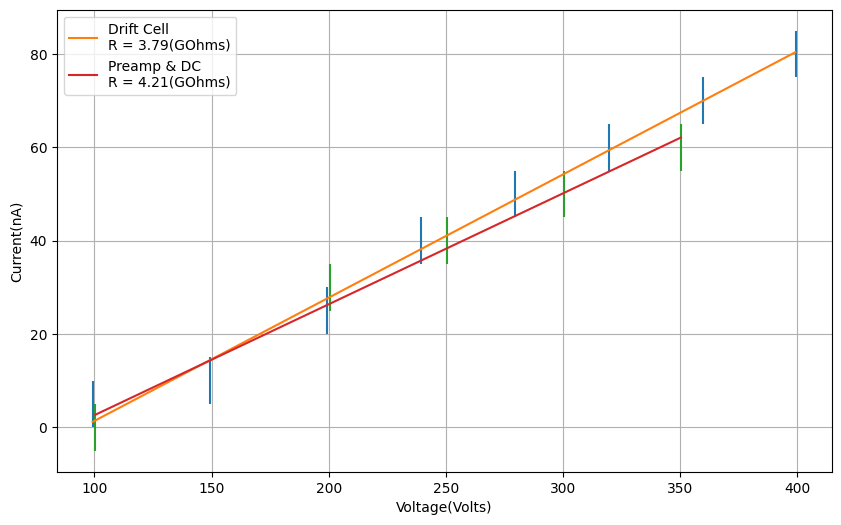

In [46]:
x1=np.array([99.2,149.4,199.4,239.4,279.4,319.6,359.6,399.6] )
dx1=.2

y1=np.array([5,10,25,40,50,60,70,80])
dy1=5

x2=np.array([99.4,199.4,249.4,299.6,349.6])+1
y2=[0,30,40,50,60]

dx2=.2
dy2=5
fit1_popt, fit1_pcov = curve_fit(func, 
                                     x1, 
                                     y1,
                                     )


fit2_popt, fit2_pcov = curve_fit(func, 
                                     x2, 
                                     y2,
                                     )



x1fit=np.arange((min(x1)),max(x1),1)
y1fit=func(x1fit,fit1_popt[0],fit1_popt[1])

x2fit=np.arange((min(x2)),max(x2),1)
y2fit=func(x2fit,fit2_popt[0],fit2_popt[1])

print(fit1_popt,fit2_popt)
print(fit1_pcov,"\n",fit2_pcov)
fig, plots = plt.subplots(1, 1, figsize=(10,6))

plt.errorbar(x=x1,xerr=dx1,y=y1,yerr=dy1,fmt=' ')
plt.errorbar(x=x1fit,y=y1fit,label="Drift Cell \nR = %.2f(GOhms)"%(1/fit1_popt[0]))

plt.errorbar(x=x2,xerr=dx2,y=y2,yerr=dy2,fmt=' ')
plt.errorbar(x=x2fit,y=y2fit,label="Preamp & DC \nR = %.2f(GOhms)"%(1/fit2_popt[0]))



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(nA)")
plt.grid(True)

plt.legend()


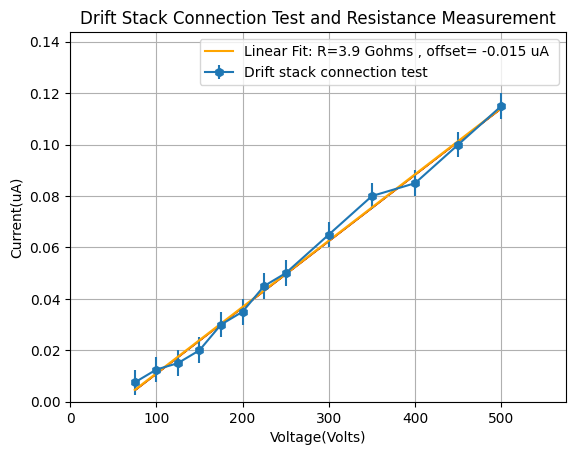

In [105]:
v = [75,100,125,150,175,200,225,250,300,350,400,450,500]
a = np.array([0.0075,0.0125,0.015,0.02,0.03,0.035,0.045,0.05,0.065,0.08,0.085,0.100,0.115])





fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])

m_err=fit1_pcov[0][0]
yint_err=fit1_pcov[1][1]
yfit1_err_max=func(xfit1,fit1_popt[0]+m_err,fit1_popt[1]+yint_err) 
yfit1_err_min=func(xfit1,fit1_popt[0]-m_err,fit1_popt[1]-yint_err)
yerr=np.vstack((yfit1_err_min,yfit1_err_max))

plt.fill_between(x=xfit1,y1=yfit1_err_min, y2=yfit1_err_max, color='chocolate')
plt.errorbar(x=xfit1,y=yfit1, 
             c='orange',
             label="Linear Fit: R=%.1f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


plt.errorbar(x=v,y=a,yerr=0.005, marker="h", label="Drift stack connection test",fmt="")





fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
xfit2_l=np.arange(0, np.max(v),1)
yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=4
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
#plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.2f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
#plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)
plt.title("Drift Stack Connection Test and Resistance Measurement")
plt.legend()

In [78]:
fit1_pcov

array([[ 3.17445402e-11, -8.05822956e-09],
       [-8.05822956e-09,  2.59450579e-06]])

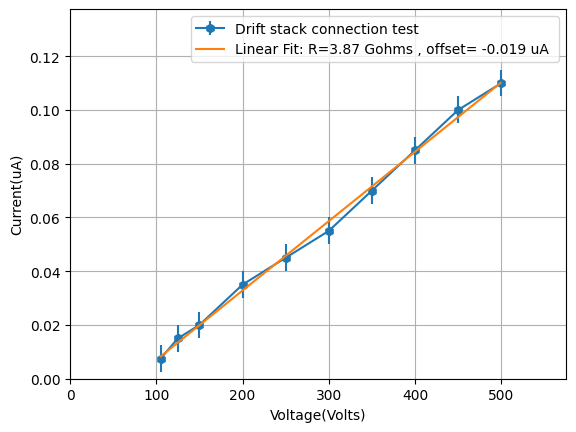

In [106]:
v = np.array([105   ,125  ,150  ,200   ,250  ,300  ,350 ,400  ,450  ,500  ])
a = np.array([0.0075,0.015,0.02 ,0.035 ,0.045,0.055,0.07,0.085,0.100,0.110])



plt.errorbar(x=v,y=a,yerr=0.005, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
xfit2_l=np.arange(0, np.max(v),1)
yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=4
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
#plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.2f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
#plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

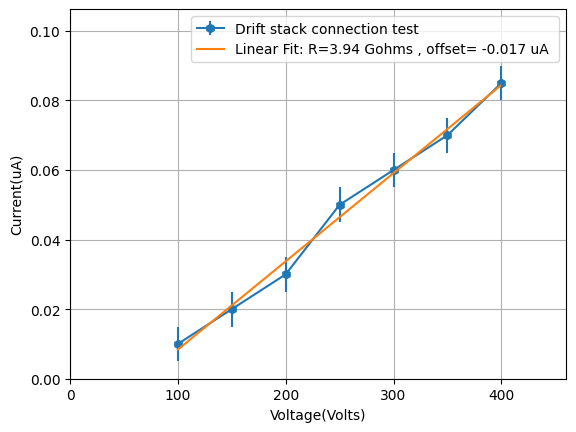

In [6]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([100   ,150  ,200 ,250, 300 ,350, 400]) # June 25th
a = np.array([0.01,0.02,0.03,0.05,0.06,0.07,0.085])



plt.errorbar(x=v,y=a,yerr=0.005, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
xfit2_l=np.arange(0, np.max(v),1)
yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=2
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
#plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.2f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
#plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

In [5]:
drift_length_measurments=np.array([20.06,20.11,20.12,20.24,20.18,20.2])
print(drift_length_measurments.mean(),np.std(drift_length_measurments))

20.151666666666667 0.060667582410670794


In [5]:
20.15-0.66


19.49

In [7]:
np.sqrt(0.06**2 + 0.01**2)

0.0608276253029822

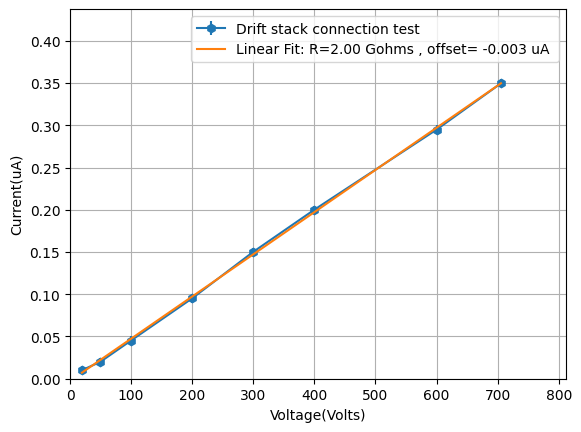

In [14]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([19.4,49.6,99.4,199.6,299.6,399.8,600.2,706]) # June 25th
a = np.array([0.01,0.02,0.045,0.095,0.15,0.2,0.295,0.350])



plt.errorbar(x=v,y=a,yerr=0.005, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
#plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.2f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
#plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

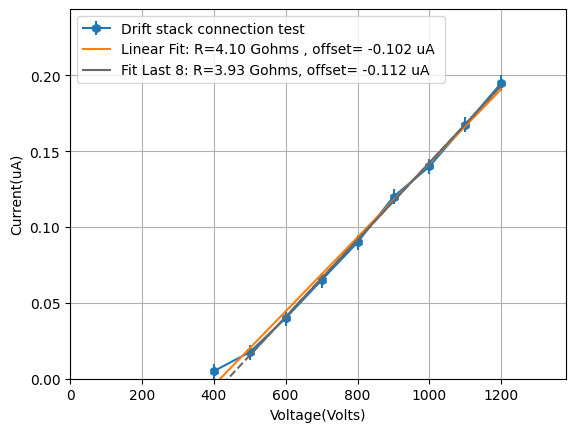

In [28]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([400,500,600,700,800,900,1000,1100,1200]) # June 25th
a = np.array([0.005,0.0175,0.04,0.065,0.09,0.12,0.140,0.1675,0.195])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.2f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

## Test 20250117
### in atmo

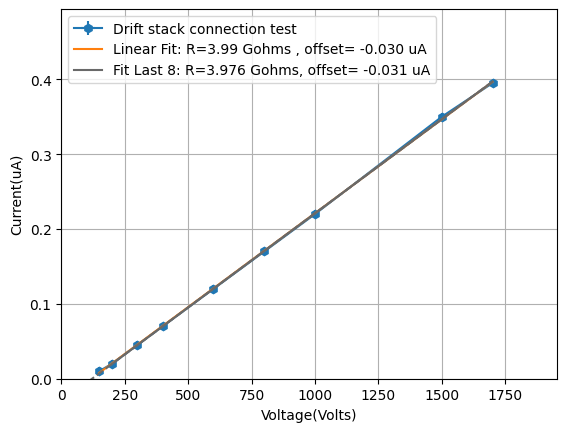

In [10]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([149.4,199.4,299.4,399.6,599.8,800,1000,1499.8,1699.8])
a = np.array([0.01,0.02,0.045,0.07,0.12,0.17,0.22,0.35,0.395])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

### In cell but open

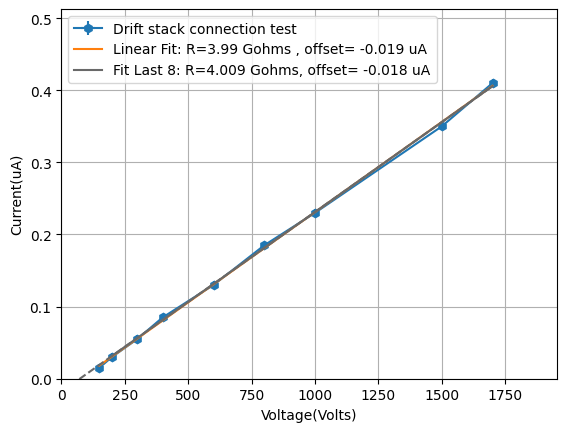

In [19]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([149.4,199.4,299.6,399.6,600,800,1000,1499.8,1699.8])
a = np.array([0.015,0.03,0.055,0.085,0.13,0.185,0.23,0.35,0.410])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

### 20250121 - in cell/closed

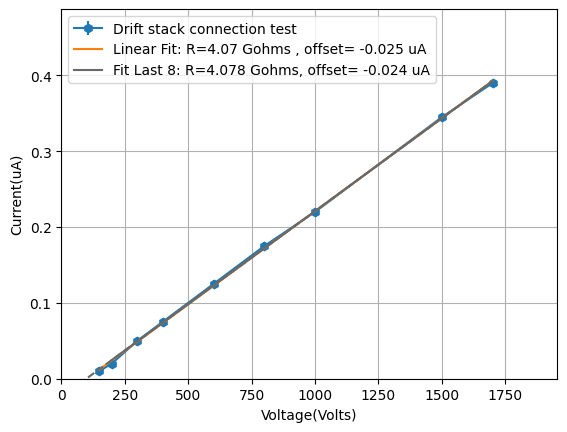

In [23]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([149.4,199.4,299.6,399.6,600 ,800 ,1000,1499.8,1699.8])
a = np.array([0.01,0.02,0.05,0.075 ,0.125,0.175,0.22,0.345,0.390])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

## 20250304 - outside

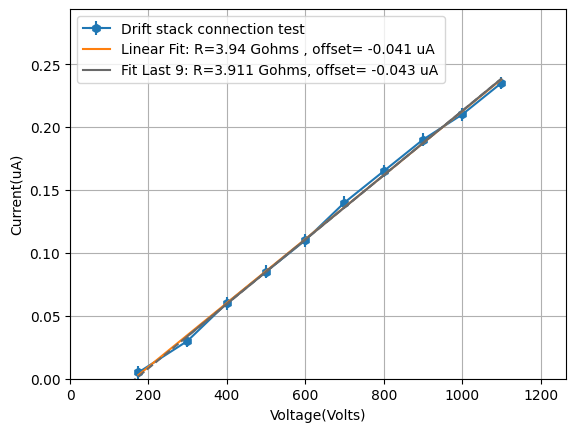

In [12]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([174.4,299.4,399.6,499.6,599.8,699.8,800,900,1000,1099.8])
a = np.array([0.005,0.030,0.06,0.085,0.11,0.14,0.165,0.19,0.21,0.235])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

# 20250415 - outside

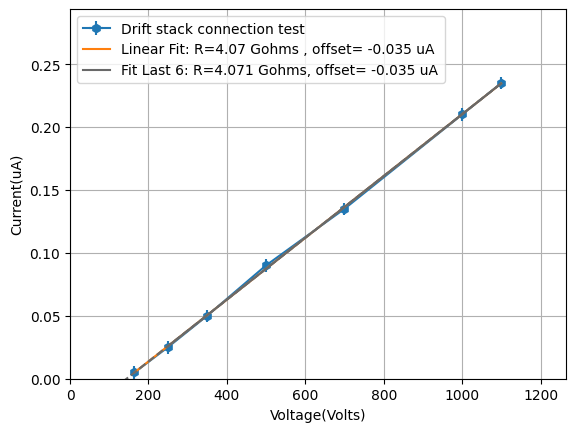

In [3]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([164.4,249.4,349.4,499.6,699.8,1000.0,1100])
a = np.array([0.005,0.025,0.05,0.09,0.135,0.21,0.235])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

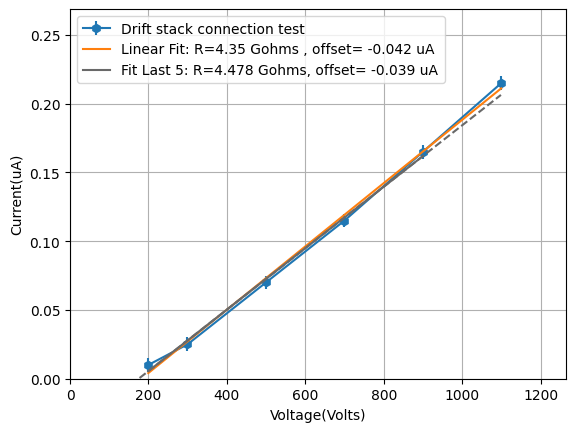

In [11]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([1100 ,900  ,700   ,499.8, 299.6 ,199.6])
a = np.array([0.215,0.165,0.115 ,0.070, 0.025, 0.010])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()

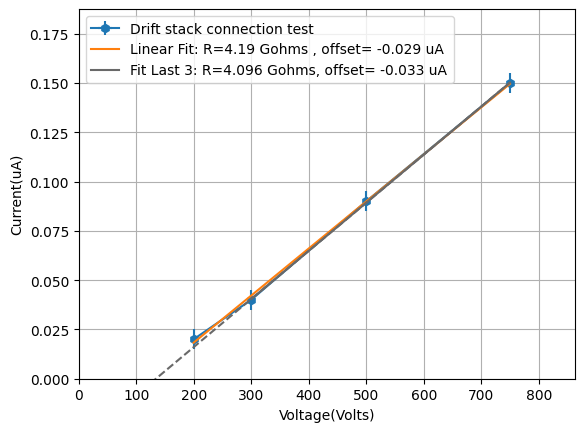

In [12]:
#v = np.array([100   ,199.8  ,299.8 ,399.8, 500 ,600, 699.8, 800.0, 1000  ])
#a = np.array([0.00  ,0.02   ,0.05  ,0.075, 0.1 ,0.12,0.145, 0.170, 0.220])

v = np.array([199.6,299.6,499.8,749.8])
a = np.array([0.02,0.04,0.09,0.150])



plt.errorbar(x=v,y=a,yerr=0.005,xerr=1, marker="h", label="Drift stack connection test",fmt="")

fit1_popt, fit1_pcov = curve_fit(func,v,a,)
xfit1=np.arange(np.min(v), np.max(v),1)
yfit1=func(xfit1,fit1_popt[0],fit1_popt[1])
plt.errorbar(x=xfit1,y=yfit1, label="Linear Fit: R=%.2f Gohms , offset= %.3f uA "%(1/(fit1_popt[0]*10**(-6)*10**(9)) , fit1_popt[1] ))


# fit2_popt, fit2_pcov = curve_fit(func,v[:3],a[:3])
# xfit2=np.arange(np.min(v[:3]), np.max(v[:3]),1)
# xfit2_l=np.arange(0, np.max(v),1)
# yfit2=func(xfit2,fit2_popt[0],fit2_popt[1])
# yfit2_l=func(xfit2_l,fit2_popt[0],fit2_popt[1],)
#plt.errorbar(x=xfit2,y=yfit2, color="r",label="Fit First 4: R=%.2f Gohms, offset= %.3f uA"%(1/(fit2_popt[0]*10**(-6)*10**(9)),  fit2_popt[1] ))
#plt.errorbar(x=xfit2_l,y=yfit2_l,fmt="--",color="r")


f_bin=1
fit3_popt, fit3_pcov = curve_fit(func,v[f_bin:],a[f_bin:])
xfit3=np.arange(np.min(v[f_bin:]), np.max(v[f_bin:]),1)
size=len(v[f_bin:])
yfit3=func(xfit3,fit3_popt[0],fit3_popt[1])
xfit3_l=np.arange(0, np.max(v),1)
yfit3_l=func(xfit3_l,fit3_popt[0],fit3_popt[1],)
plt.errorbar(x=xfit3,y=yfit3,c="dimgrey", label="Fit Last %i: R=%.3f Gohms, offset= %.3f uA"%(size,1/(fit3_popt[0]*10**(-6)*10**(9)) , fit3_popt[1]))
plt.errorbar(x=xfit3_l,y=yfit3_l,fmt="--",color="dimgrey")



plt.xlabel("Voltage(Volts)")
plt.ylabel("Current(uA)")
plt.grid(True)
plt.xlim(0,np.max(v)*1.15)
plt.ylim(0,np.max(a)*1.25)

plt.legend()